In [ ]:
# get all the imports

# all the imports 
import warnings

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# HTTP requests and web scraping
import requests
from bs4 import BeautifulSoup
from io import StringIO

import urllib.parse

import os
from glob import glob

print("All imports work! Your environment is ready for data analysis and web scraping.")


In [38]:
#formatting for data set

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None

pd.set_option("display.max_colwidth", None)

In [ ]:
#Finding all the files in the checkpoint drive. 

# Specify the directory where checkpoints are saved
checkpoint_dir = 'Web_scraping_checkpoints_zerozero'

# Find all CSV files in that directory
checkpoint_files = glob(f'{checkpoint_dir}/*.csv')

# Print what we found
print(f"Found {len(checkpoint_files)} checkpoint files:")
for file in checkpoint_files:
    print(f"{file}")

In [39]:
#create an empty list with all the data 

zerozero_data_all = []

# Loop through each checkpoint file
for file in checkpoint_files:
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Add it to our list
    zerozero_data_all.append(df)
    
    # Print number of rows in each data set
    print(f"Loaded {len(df)} rows from {file}")

#created a dataframe for all zerozero data
zerozero_df = pd.concat(zerozero_data_all, ignore_index=True)

Loaded 174 rows from Web_scraping_checkpoints_zerozero/checkpoint_batch1_10_players.csv
Loaded 520 rows from Web_scraping_checkpoints_zerozero/checkpoint_batch1_30_players.csv
Loaded 682 rows from Web_scraping_checkpoints_zerozero/checkpoint_batch1_40_players.csv
Loaded 841 rows from Web_scraping_checkpoints_zerozero/checkpoint_batch1_50_players.csv
Loaded 360 rows from Web_scraping_checkpoints_zerozero/checkpoint_batch1_20_players.csv


+++ TIme to audit information 

In [40]:
## pull the data set - Immaculate Data Version 

fifa_data = "https://raw.githubusercontent.com/fern-1210/IronHack-w3-Modual1-Project3/main/Data/Clean/The%20Immaculate%20Data.csv"
fifa = pd.read_csv(fifa_data)

#view info 
display(fifa.shape)

(3684, 30)

In [43]:
#creating pivot table + cleaning coloum names 


# Create pivot table of the zerozero data
pivot_zerozero = combined_df.pivot_table(    
                index=['ID', 'Name', 'SearchURL', 'Player'],  
                columns='Year',
                values='MarketValue', 
                aggfunc='mean'            
)

# Reset index 
pivot_zerozero = pivot_zerozero.reset_index()

# Rename year columns especially "Year_" 
new_columns = {}
for col in pivot_zerozero.columns:
    if isinstance(col, float):  # If it's a year column (numeric)
        new_columns[col] = f'ZZ_Market_Value_{int(col)}'  # Convert to Year_2018, Year_2019, etc.

# Apply the renaming
pivot_zerozero = pivot_zerozero.rename(columns=new_columns)

pivot_zerozero


Year,ID,Name,SearchURL,Player,ZZ_Market_Value_2018,ZZ_Market_Value_2019,ZZ_Market_Value_2020,ZZ_Market_Value_2021,ZZ_Market_Value_2022,ZZ_Market_Value_2023,ZZ_Market_Value_2024
0,20801,C. Ronaldo,https://www.google.com/search?q=C.+Ronaldo+zerozero+valor-de-mercado,7.Cristiano Ronaldo,NaN,90.00,60.00,44.83,22.50,14.75,14.50
1,155862,S. Ramos,https://www.google.com/search?q=S.+Ramos+zerozero+valor-de-mercado,93.Sergio Ramos,NaN,17.00,14.25,10.50,6.25,4.20,2.67
2,158023,L. Messi,https://www.google.com/search?q=L.+Messi+zerozero+valor-de-mercado,Lionel Messi,178.33,145.00,99.00,67.00,50.00,37.50,28.50
3,162347,J. Moutinho,https://www.google.com/search?q=J.+Moutinho+zerozero+valor-de-mercado,8.João Moutinho,10.17,10.00,6.25,4.00,2.30,375.75,700.00
4,168651,I. Rakitić,https://www.google.com/search?q=I.+Rakiti%C4%87+zerozero+valor-de-mercado,11.Ivan Rakitic,55.80,38.75,15.25,8.83,5.50,4.00,3.33
5,171875,C. Erkin,https://www.google.com/search?q=C.+Erkin+zerozero+valor-de-mercado,88.Caner Erkin,2.00,1.55,1.40,1.27,625.25,387.50,262.50
6,173731,G. Bale,https://www.google.com/search?q=G.+Bale+zerozero+valor-de-mercado,Gareth Bale,80.67,63.00,29.40,12.88,2.73,NaN,NaN
7,176676,M. arcelo,https://www.google.com/search?q=M.+arcelo+zerozero+valor-de-mercado,44.Marcelo,2.45,425.25,400.00,483.33,325.00,200.00,133.33
8,177003,L. Modrić,https://www.google.com/search?q=L.+Modri%C4%87+zerozero+valor-de-mercado,14.Luka Modrić,30.33,18.00,10.33,9.50,9.75,10.00,7.38
9,177413,A. Witsel,https://www.google.com/search?q=A.+Witsel+zerozero+valor-de-mercado,Axel Witsel,NaN,NaN,19.00,9.00,4.50,5.00,3.50


In [58]:
#Merge my dataset

merged_data = fifa.merge(
    pivot_zerozero,
    on=['ID', 'Name'],           # Columns to match on
    how='inner'                  # Only keep rows that exist in BOTH datasets
)

merged_data.shape

(43, 39)

In [ ]:
# Select specific columns so we can conduct an audit on the zezro & fifa market value. 
final_data = merged_data[[
    'ID', 
    'Name',
    'ZZ_Market_Value_2019',
    'ZZ_Market_Value_2020', 
    'ZZ_Market_Value_2021',
    'ZZ_Market_Value_2022',
    'ZZ_Market_Value_2023',
    'Player',
    '2019 Value',
    '2020 Value',
    '2021 Value',
    '2022 Value',
    '2023 Value'
]]

final_data = final_data.copy()

# List of columns to convert
value_columns = ['2019 Value', '2020 Value', '2021 Value', '2022 Value', '2023 Value']

# Divide each column by 1,000,000 to convert to millions
for col in value_columns:
    final_data[col] = final_data[col] / 1000000

final_data

,ID,Name,ZZ_Market_Value_2019,ZZ_Market_Value_2020,ZZ_Market_Value_2021,ZZ_Market_Value_2022,ZZ_Market_Value_2023,Player,2019 Value,2020 Value,2021 Value,2022 Value,2023 Value
0,194765,A. Griezmann,125.00,84.75,54.33,31.50,24.00,7.Antoine Griezmann,71.00,69.00,50.50,53.00,30.50
1,177003,L. Modrić,18.00,10.33,9.50,9.75,10.00,14.Luka Modrić,67.00,39.00,24.50,32.00,29.00
2,224334,M. Acuña,16.00,12.75,15.50,16.50,9.50,21.Marcos Acuña,19.00,20.00,22.00,37.00,46.50
3,192985,K. De Bruyne,140.00,120.00,96.00,82.50,64.50,11.Kevin De Bruyne,93.00,90.00,87.00,125.50,107.50
4,178518,R. Nainggolan,27.20,11.62,4.50,318.33,625.00,Radja Nainggolan,35.50,27.50,20.00,13.00,3.50
5,212198,B. Fernandes,45.25,64.00,88.00,82.00,72.00,8.Bruno Fernandes,50.00,56.50,63.00,107.50,78.50
6,176676,M. arcelo,425.25,400.00,483.33,325.00,200.00,44.Marcelo,32.00,22.50,16.00,11.00,9.00
7,212462,A. Telles,31.00,38.00,22.33,15.50,8.50,13.Alex Telles,31.00,31.50,31.00,27.50,18.50
8,173731,G. Bale,63.00,29.40,12.88,2.73,NaN,Gareth Bale,45.00,37.50,24.50,25.00,20.50
9,181872,A. Vidal,15.33,9.33,4.75,1.98,417.07,Arturo Vidal,33.00,23.50,15.00,12.00,12.00


In [ ]:
####### analysis on data above

In [56]:
#Correlation Analysis - PER PLAYER

"""
Purpose: How strongly do zerozero and FIFA values move together FOR EACH PLAYER?

Player correlation coefficient (r) across 2019-2023
Shows if a player's FIFA trajectory matches their ZZ trajectory
Reasoning: If r ≈ 1, both sources track the player's value similarly over time
"""

# Calculate correlation for each player across years
player_correlations = []

for idx, row in final_data.iterrows():
    # Get FIFA values across years for this player
    fifa_values = [
        row['2019 Value'],
        row['2020 Value'],
        row['2021 Value'],
        row['2022 Value'],
        row['2023 Value']
    ]
    
    # Get ZZ values across years for this player
    zz_values = [
        row['ZZ_Market_Value_2019'],
        row['ZZ_Market_Value_2020'],
        row['ZZ_Market_Value_2021'],
        row['ZZ_Market_Value_2022'],
        row['ZZ_Market_Value_2023']
    ]
    
    # Calculate correlation between the two series
    corr = pd.Series(fifa_values).corr(pd.Series(zz_values))
    
    player_correlations.append({
        'ID': row['ID'],
        'Name': row['Name'],
        'Player_Correlation': corr
    })

# Convert to DataFrame
player_corr_df = pd.DataFrame(player_correlations)

# Add correlation back to final_data
final_data = final_data.merge(player_corr_df, on=['ID', 'Name'], how='left')

# Display results sorted by correlation
print("PLAYER CORRELATIONS (FIFA vs ZZ over 2019-2023)")
print("="*80)
display(player_corr_df.sort_values('Player_Correlation', ascending=False))

print("\n" + "="*50)
print("Interpretation:")
print("1.0 = Perfect agreement - both sources track player identically")
print("0.7-0.9 = Strong - similar trajectory over time")
print("0.4-0.7 = Moderate - some agreement on trajectory")
print("< 0.4 = Weak - different views on player's value evolution")
print("Negative = Inverse - when one goes up, other goes down")

PLAYER CORRELATIONS (FIFA vs ZZ over 2019-2023)


/opt/miniconda3/envs/project-3_julian/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/miniconda3/envs/project-3_julian/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/miniconda3/envs/project-3_julian/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,ID,Name,Player_Correlation
22,189125,G. Bonaventura,0.99
1,177003,L. Modrić,0.97
31,192638,M. Alonso,0.96
36,183394,M. Sissoko,0.96
15,20801,C. Ronaldo,0.96
24,168651,I. Rakitić,0.96
8,173731,G. Bale,0.96
19,158023,L. Messi,0.93
27,211117,D. Alli,0.93
14,155862,S. Ramos,0.93



Interpretation:
1.0 = Perfect agreement - both sources track player identically
0.7-0.9 = Strong - similar trajectory over time
0.4-0.7 = Moderate - some agreement on trajectory
< 0.4 = Weak - different views on player's value evolution
Negative = Inverse - when one goes up, other goes down


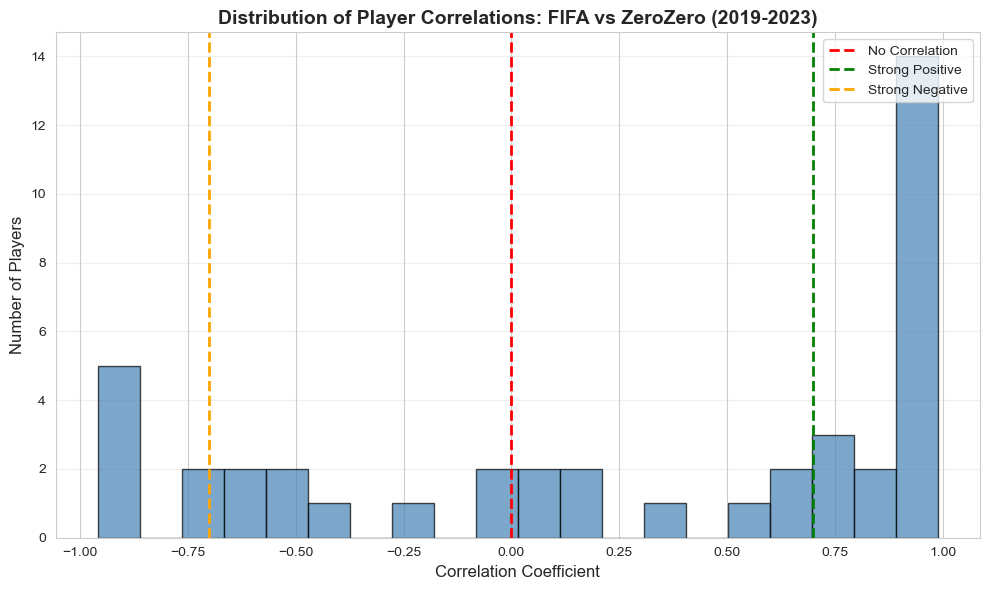


SUMMARY STATISTICS:
Mean Correlation: 0.261
Median Correlation: 0.608
Std Dev: 0.708
Players with positive correlation: 27
Players with negative correlation: 15


In [57]:
#visualizing the above. 

# Set style
sns.set_style("whitegrid")

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create histogram
ax.hist(player_corr_df['Player_Correlation'].dropna(), 
        bins=20, 
        edgecolor='black', 
        color='steelblue',
        alpha=0.7)

# Add vertical lines for interpretation zones
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No Correlation')
ax.axvline(x=0.7, color='green', linestyle='--', linewidth=2, label='Strong Positive')
ax.axvline(x=-0.7, color='orange', linestyle='--', linewidth=2, label='Strong Negative')

# Labels and title
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_ylabel('Number of Players', fontsize=12)
ax.set_title('Distribution of Player Correlations: FIFA vs ZeroZero (2019-2023)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary stats
print("\nSUMMARY STATISTICS:")
print("="*50)
print(f"Mean Correlation: {player_corr_df['Player_Correlation'].mean():.3f}")
print(f"Median Correlation: {player_corr_df['Player_Correlation'].median():.3f}")
print(f"Std Dev: {player_corr_df['Player_Correlation'].std():.3f}")
print(f"Players with positive correlation: {(player_corr_df['Player_Correlation'] > 0).sum()}")
print(f"Players with negative correlation: {(player_corr_df['Player_Correlation'] < 0).sum()}")

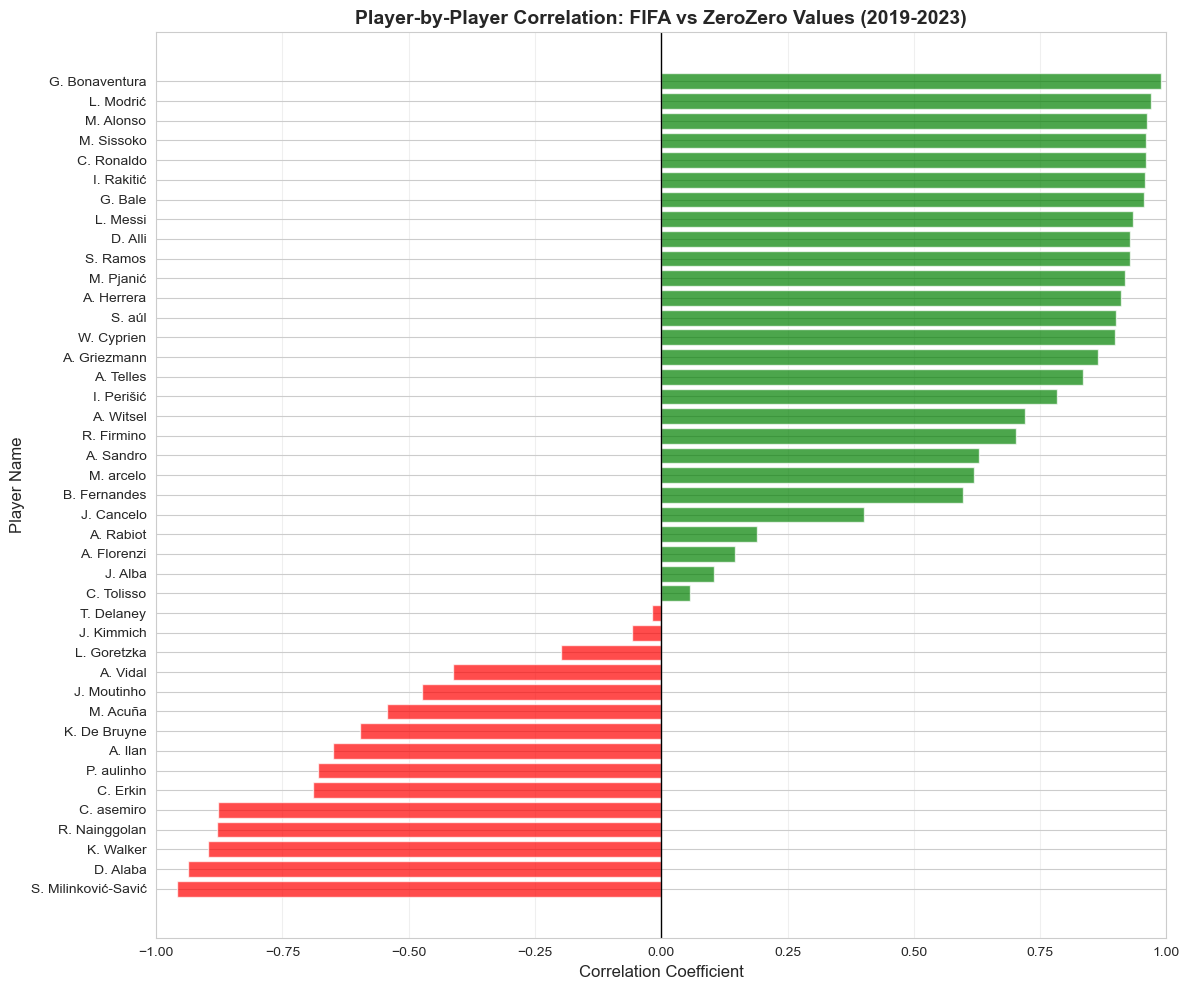

In [59]:
#Visual 2: Bar Chart of Individual Players


# Sort by correlation
sorted_corr = player_corr_df.sort_values('Player_Correlation', ascending=True).dropna()

# Create figure
fig, ax = plt.subplots(figsize=(12, 10))

# Create horizontal bar chart
colors = ['red' if x < 0 else 'green' for x in sorted_corr['Player_Correlation']]
ax.barh(sorted_corr['Name'], sorted_corr['Player_Correlation'], color=colors, alpha=0.7)

# Add vertical line at 0
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)

# Labels
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_ylabel('Player Name', fontsize=12)
ax.set_title('Player-by-Player Correlation: FIFA vs ZeroZero Values (2019-2023)', 
             fontsize=14, fontweight='bold')
ax.set_xlim(-1, 1)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

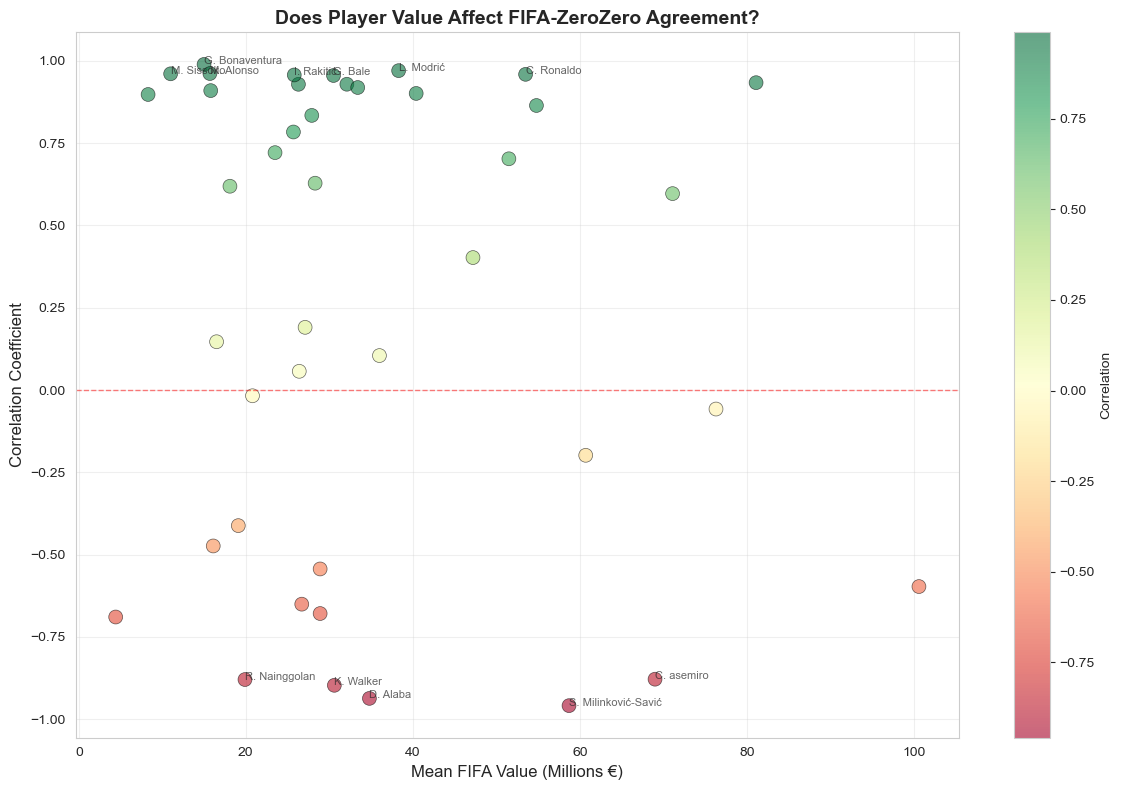

In [60]:
#visual 3: scatter plot - correlation vs. mean

# Calculate mean FIFA value for each player
final_data['Mean_FIFA_Value'] = final_data[['2019 Value', '2020 Value', '2021 Value', 
                                              '2022 Value', '2023 Value']].mean(axis=1)

# Merge with correlation data
viz_data = final_data[['Name', 'Mean_FIFA_Value', 'Player_Correlation']].copy()

# Create scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(viz_data['Mean_FIFA_Value'], 
                     viz_data['Player_Correlation'],
                     s=100, 
                     alpha=0.6,
                     c=viz_data['Player_Correlation'],
                     cmap='RdYlGn',
                     edgecolors='black',
                     linewidth=0.5)

# Add player names for extreme cases
for idx, row in viz_data.iterrows():
    # Label players with very high or very low correlation
    if row['Player_Correlation'] > 0.95 or row['Player_Correlation'] < -0.8:
        ax.annotate(row['Name'], 
                   (row['Mean_FIFA_Value'], row['Player_Correlation']),
                   fontsize=8,
                   alpha=0.7)

# Add horizontal line at 0
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)

# Labels
ax.set_xlabel('Mean FIFA Value (Millions €)', fontsize=12)
ax.set_ylabel('Correlation Coefficient', fontsize=12)
ax.set_title('Does Player Value Affect FIFA-ZeroZero Agreement?', 
             fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Correlation', fontsize=10)

plt.tight_layout()
plt.show()

In [53]:
#Difference Analysis

# Calculate absolute and percentage differences for each year
for year in years:
    fifa_col = f'{year} Value'
    zz_col = f'ZZ_Market_Value_{year}'
    
    # Absolute difference (FIFA - ZZ)
    final_data[f'Diff_Absolute_{year}'] = final_data[fifa_col] - final_data[zz_col]
    
    # Percentage difference: (FIFA - ZZ) / ZZ * 100
    final_data[f'Diff_Percentage_{year}'] = (
        (final_data[fifa_col] - final_data[zz_col]) / final_data[zz_col] * 100
    )

# Display the updated dataframe with new columns
print("New columns added:")
print([col for col in final_data.columns if 'Diff_' in col])
print("\nFirst few rows with differences:")
display(final_data.head())

New columns added:
['Diff_Absolute_2019', 'Diff_Percentage_2019', 'Diff_Absolute_2020', 'Diff_Percentage_2020', 'Diff_Absolute_2021', 'Diff_Percentage_2021', 'Diff_Absolute_2022', 'Diff_Percentage_2022', 'Diff_Absolute_2023', 'Diff_Percentage_2023']

First few rows with differences:


,ID,Name,ZZ_Market_Value_2019,ZZ_Market_Value_2020,ZZ_Market_Value_2021,ZZ_Market_Value_2022,ZZ_Market_Value_2023,Player,2019 Value,2020 Value,2021 Value,2022 Value,2023 Value,Diff_Absolute_2019,Diff_Percentage_2019,Diff_Absolute_2020,Diff_Percentage_2020,Diff_Absolute_2021,Diff_Percentage_2021,Diff_Absolute_2022,Diff_Percentage_2022,Diff_Absolute_2023,Diff_Percentage_2023
0,194765,A. Griezmann,125.00,84.75,54.33,31.50,24.00,7.Antoine Griezmann,71.00,69.00,50.50,53.00,30.50,-54.00,-43.20,-15.75,-18.58,-3.83,-7.06,21.50,68.25,6.50,27.08
1,177003,L. Modrić,18.00,10.33,9.50,9.75,10.00,14.Luka Modrić,67.00,39.00,24.50,32.00,29.00,49.00,272.22,28.67,277.42,15.00,157.89,22.25,228.21,19.00,190.00
2,224334,M. Acuña,16.00,12.75,15.50,16.50,9.50,21.Marcos Acuña,19.00,20.00,22.00,37.00,46.50,3.00,18.75,7.25,56.86,6.50,41.94,20.50,124.24,37.00,389.47
3,192985,K. De Bruyne,140.00,120.00,96.00,82.50,64.50,11.Kevin De Bruyne,93.00,90.00,87.00,125.50,107.50,-47.00,-33.57,-30.00,-25.00,-9.00,-9.38,43.00,52.12,43.00,66.67
4,178518,R. Nainggolan,27.20,11.62,4.50,318.33,625.00,Radja Nainggolan,35.50,27.50,20.00,13.00,3.50,8.30,30.51,15.88,136.56,15.50,344.44,-305.33,-95.92,-621.50,-99.44


In [54]:
#summary statistical difference

# Calculate summary statistics for each year
import numpy as np

summary_stats = []

for year in years:
    diff_abs_col = f'Diff_Absolute_{year}'
    diff_pct_col = f'Diff_Percentage_{year}'
    
    stats = {
        'Year': year,
        'Mean_Abs_Diff': final_data[diff_abs_col].mean(),
        'Median_Abs_Diff': final_data[diff_abs_col].median(),
        'Std_Abs_Diff': final_data[diff_abs_col].std(),
        'Mean_Pct_Diff': final_data[diff_pct_col].mean(),
        'Median_Pct_Diff': final_data[diff_pct_col].median(),
        'Max_Overvalued_Player': final_data.loc[final_data[diff_abs_col].idxmax(), 'Name'],
        'Max_Overvalued_Amount': final_data[diff_abs_col].max(),
        'Max_Undervalued_Player': final_data.loc[final_data[diff_abs_col].idxmin(), 'Name'],
        'Max_Undervalued_Amount': final_data[diff_abs_col].min()
    }
    summary_stats.append(stats)

# Convert to DataFrame for easy viewing
summary_df = pd.DataFrame(summary_stats)
print("\nSUMMARY STATISTICS BY YEAR:")
print("="*80)
display(summary_df)


SUMMARY STATISTICS BY YEAR:


,Year,Mean_Abs_Diff,Median_Abs_Diff,Std_Abs_Diff,Mean_Pct_Diff,Median_Pct_Diff,Max_Overvalued_Player,Max_Overvalued_Amount,Max_Undervalued_Player,Max_Undervalued_Amount
0,2019,-18.11,-9.33,67.40,67.85,-17.78,L. Modrić,49.00,M. arcelo,-393.25
1,2020,-9.97,-1.50,60.83,76.89,-3.54,A. llan,28.90,M. arcelo,-377.50
2,2021,-10.27,3.83,73.47,70.04,22.32,A. llan,21.00,M. arcelo,-467.33
3,2022,-14.06,15.23,119.52,157.33,89.19,K. De Bruyne,43.00,C. Erkin,-621.35
4,2023,-31.59,12.25,143.61,178.00,123.48,C. asemiro,52.00,R. Nainggolan,-621.50


In [55]:
#Trend analysis over time 

# Calculate average difference trend over time
trend_data = []

for year in years:
    diff_abs_col = f'Diff_Absolute_{year}'
    diff_pct_col = f'Diff_Percentage_{year}'
    
    trend_data.append({
        'Year': year,
        'Avg_Absolute_Diff': final_data[diff_abs_col].mean(),
        'Avg_Percentage_Diff': final_data[diff_pct_col].mean()
    })

trend_df = pd.DataFrame(trend_data)

print("\nTREND: Average Difference Over Time")
print("="*80)
display(trend_df)

print("\nInterpretation:")
print("- Positive values = FIFA values higher than ZZ on average")
print("- Negative values = ZZ values higher than FIFA on average")
print("- Increasing trend = Gap widening over time")
print("- Decreasing trend = Gap closing over time")


TREND: Average Difference Over Time


,Year,Avg_Absolute_Diff,Avg_Percentage_Diff
0,2019,-18.11,67.85
1,2020,-9.97,76.89
2,2021,-10.27,70.04
3,2022,-14.06,157.33
4,2023,-31.59,178.00



Interpretation:
- Positive values = FIFA values higher than ZZ on average
- Negative values = ZZ values higher than FIFA on average
- Increasing trend = Gap widening over time
- Decreasing trend = Gap closing over time
